In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("6 advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


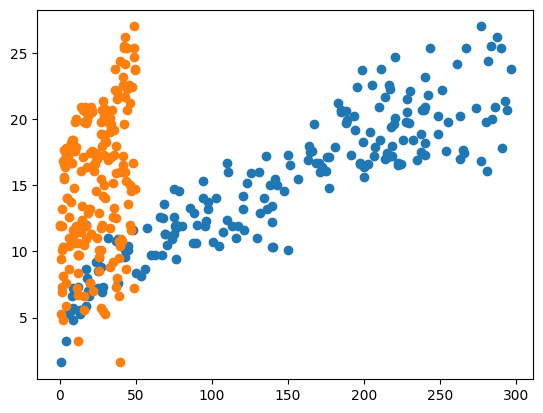

In [4]:
plt.scatter(x=df['TV'],y=df['Sales'])
plt.scatter(x=df['Radio'],y=df['Sales'])

In [5]:
X = df.drop('Sales',axis=1)
y = df['Sales']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from  sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
from sklearn.metrics import mean_absolute_error,r2_score
y_pred = lr.predict(X_test)
print("mean absolute error ",mean_absolute_error(y_test, y_pred))
print("r2 score" , r2_score(y_test, y_pred))

mean absolute error  1.2748262109549338
r2 score 0.9059011844150826


# predicted system

In [10]:
def predict_sales(tv_budget,radio_budget,newspaper_budget):
    features = np.array([[tv_budget,radio_budget,newspaper_budget]])
    results = lr.predict(features).reshape(1,-1)
    return results[0]

In [19]:
df.iloc[6]

TV           57.5
Radio        32.8
Newspaper    23.5
Sales        11.8
Name: 6, dtype: float64

In [20]:
tv_budget =  57.5
radio_budget = 32.8
newspaper_budget= 23.5
sales = predict_sales(tv_budget,radio_budget,newspaper_budget)

c:\Users\mohds\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
sales

array([11.26132856])

In [22]:
import pickle 
pickle.dump(lr, open('linear_regression_model.pkl','wb'))